## 1. 서브워드 토큰화 개요

서브워드 토큰화(Subword Tokenization)는 단어보다 작은 단위로 텍스트를 분할하는 방법입니다. 이는 미등록 단어(OOV) 문제를 해결하고 어휘 크기를 효율적으로 관리하는 데 도움이 됩니다.

### 서브워드 토큰화의 장점:
- 어휘 크기 축소
- 미등록 단어 처리 가능
- 형태적으로 유사한 단어 간 정보 공유
- 다국어 처리에 효과적

형태소 분석과 서브워드 토큰화 차이점

다음 단어들이 있을 때, 형태소 분석과 서브워드 토큰화의 차이점이 가장 잘 드러날 것 같은 예시를 3개 선택하고 이유를 설명하세요.

```
'인공지능', '비정규직', '자연어처리', '미세먼지', '코로나바이러스', '불가사리', '레이어드'
```


가장 차이가 잘 드러나는 예시:

1. **코로나바이러스**:
   - 형태소 분석: '코로나' + '바이러스'
   - 서브워드: '코로', '나', '바이', '러스'와 같이 더 작은 단위로 분할 가능

2. **레이어드**:
   - 형태소 분석: 외래어로 분석하기 어려울 수 있음
   - 서브워드: '레이', '어드'와 같이 자동으로 분할 가능

3. **자연어처리**:
   - 형태소 분석: '자연어' + '처리'
   - 서브워드: '자연', '어', '처리'로 분할 가능

이유: 형태소 분석은 언어학적 규칙에 따라 의미 단위로 분할하지만, 서브워드 토큰화는 데이터 기반으로 빈도나 우도를 고려하여 분할합니다. 특히 신조어, 외래어, 복합어에서 차이가 두드러집니다.

## 주요 토큰화 알고리즘 비교
### 1. **BPE (Byte Pair Encoding)**
BPE는 텍스트에서 가장 자주 등장하는 문자 쌍을 새로운 단일 토큰으로 병합
- 단계별 작동 원리
초기 상태
예시 문장들:



```
"low"
"lowest"
"newer"
"wider"
```



1단계: 문자 레벨 토큰화  
각 단어를 문자 단위로 분해
```
"low" → l o w
"lowest" → l o w e s t
"newer" → n e w e r
"wider" → w i d e r
```
2단계: 문자 쌍 빈도 계산  
가장 빈번한 문자 쌍 찾기
복사빈도 계산:
```
'lo': 2회
'ow': 2회
'we': 2회
'er': 2회
```
3단계: 가장 빈번한 쌍 병합  
예: 'lo' 병합
```
변경 전: l o w
변경 후: lo w
```
4단계: 반복 병합  
계속해서 가장 빈번한 쌍 병합


### 2. **WordPiece**
- BPE와 유사하지만 병합 결정 기준이 빈도가 아닌 우도(likelihood)
- 확률적으로 ""말뭉치를 더 잘 설명하는 조각인가?"를 판단
- BERT 및 관련 모델에서 사용
- 하위 단어는 '##'으로 시작하는 접두사로 표시
  

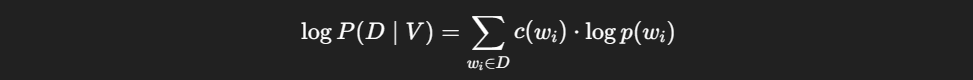

- 𝐷: 전체 말뭉치 (corpus), 예를 들어 수천 개 문장의 집합
- 𝑉 : 현재 WordPiece 어휘 사전 (subword 단위의 사전)
- c(𝑤𝑖): 서브워드 가 말뭉치에 등장한 횟수
- 𝑝(𝑤𝑖): 해당 서브워드의 확률

### 3. **SentencePiece**
- BPE 알고리즘을 개선 및 응용한 모델
- WordPiece나 BPE는 공백으로 먼저 단어를 나눈 후 토크나이즈하기 때문에 공백이 없는 언어 (예: 일본어, 중국어)에서는 어려움
- 언어에 구애받지 않는 토큰화
- 공백을 일반 문자로 취급하는 "문장 수준" 토큰화
- 공백을 '_'(언더스코어)로 표시
- T5, LLaMA 등에서 사용

### 실습해보기

In [ ]:
# 실습: 다양한 토크나이저 비교해보기

import numpy as np
import re
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from transformers import AutoTokenizer, BertTokenizer, GPT2Tokenizer, T5Tokenizer
import sentencepiece as spm

def load_tokenizers():
    tokenizers = {
        'BERT': AutoTokenizer.from_pretrained('bert-base-uncased'),
        'GPT-2': AutoTokenizer.from_pretrained('gpt2'),
        'T5': AutoTokenizer.from_pretrained('t5-small'),
        'RoBERTa': AutoTokenizer.from_pretrained('roberta-base'),

        # 한국어 특화 토크나이저 추가
        'KoBERT': AutoTokenizer.from_pretrained('skt/kobert-base-v1'),
        'KoGPT': AutoTokenizer.from_pretrained('skt/kogpt2-base-v2'),
        'KoBART': AutoTokenizer.from_pretrained('gogamza/kobart-base-v1'),
        'KLUE-BERT': AutoTokenizer.from_pretrained('klue/bert-base')
    }

    # GPT-2 토크나이저는 BOS/EOS 토큰 추가하지 않도록 설정
    tokenizers['GPT-2'].add_special_tokens({'pad_token': '[PAD]'})

    return tokenizers


In [ ]:
# 여러 토크나이저를 비교
load_tokenizers()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/371k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.83M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


tokenizer.json:   0%|          | 0.00/682k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/4.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/111 [00:00<?, ?B/s]

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


tokenizer_config.json:   0%|          | 0.00/289 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/425 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/248k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/495k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

{'BERT': BertTokenizerFast(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
 	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
 }
 ),
 'GPT-2': GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, paddi

In [ ]:
# 텍스트 리스트 이용해서 정성적으로 의미 단위 분절 여부 판단


In [ ]:
# 토큰화 정량적 성능 판단
# 1. UNK 처리 비중
# 2. 토큰의 길이(문자 수) : 너무 잘게 잘리지 않는지
# 3. 문장의 길이(토큰 수) : 하나의 문장이 너무 잘게 잘리지 않는지
# 4. 재구조화 시, 복원율 : 인코딩-디코딩 - 잘 복원이 되는지

In [ ]:
def evaluate_tokenizers(tokenizer, texts, tokenizer_name=None):
    import unicodedata as ucd

    """
    토큰화 품질 평가 함수

    매개변수:
    - tokenizer: 평가할 토크나이저 객체
    - texts: 평가에 사용할 텍스트 리스트
    - tokenizer_name: 토크나이저 이름 (결과 출력용)

    반환값:
    - 평가 지표를 담은 딕셔너리
    """

    results = {}
    name = tokenizer_name
    print(f"\n===== {name} 토크나이저 평가 =====")

    # 분석을 위한 변수 초기화
    all_tokens = []
    token_lengths = []
    tokens_per_sentence = []
    unk_count = 0
    total_tokens = 0
    recon_matches = 0

    # 토크나이저별 UNK 토큰 확인
    unk_token = tokenizer.unk_token
    print(f" {name} 토크나이저 UNK 토큰 : {unk_token}")

    # 각 텍스트별 분석
    for text in texts:
        # 토큰화
        tokens = tokenizer.tokenize(text)

        # 결과 저장
        all_tokens.extend(tokens)
        tokens_per_sentence.append(len(tokens))

        # UNK 토큰 개수 세기
        unk_count += tokens.count(unk_token)
        total_tokens += len(tokens)

        # 토큰 길이 계산 (특수 토큰 및 접두사 제외)
        # 자, 연, 어, 처, 리 vs 자연, 어, 처리
        # 접두사 제외 필요성 : ##어 : 1글자 vs 3글자 - 1글자로 판단
        # 특수토큰 제외 필요성 : [UNK] : 5글자 - 글자 수 평균을 상승 왜곡 발생
        for token in tokens:
            # 접두사 제거
            clean_token = token.replace("##", "") if "##" in token else token
            clean_token = clean_token.replace("_", "") if "_" in clean_token else clean_token
            # 특수 토큰 건너뛰기
            if not (clean_token.startswith("[") and clean_token.endswith("]")) and \
               not (clean_token.startswith("<") and clean_token.endswith(">")):
                token_lengths.append(len(clean_token))

        # 재구성 정확도 확인
        # 토큰화 후 다시 텍스트로 변환
        encoded = tokenizer(text, add_special_tokens=False)
        decoded = tokenizer.decode(encoded["input_ids"], skip_special_tokens=True)

        # 공백 정규화 후 비교
        normalized_text = ucd.normalize('NFC', " ".join(text.split()))
        normalized_decoded = ucd.normalize('NFC', " ".join(decoded.split()))

        if normalized_text == normalized_decoded:
            recon_matches += 1

    # 1. UNK 토큰 빈도
    unk_ratio = unk_count / total_tokens if total_tokens > 0 else 0
    results["unk_ratio"] = unk_ratio

    # 2. 평균 토큰 길이
    avg_token_length = np.mean(token_lengths) if token_lengths else 0
    results["avg_token_length"] = avg_token_length

    # 3. 문장당 평균 토큰 수
    avg_tokens_per_sentence = np.mean(tokens_per_sentence)
    results["avg_tokens_per_sentence"] = avg_tokens_per_sentence

    # 4. 재구성 정확도
    recon_acc = recon_matches / len(texts)
    results["recon_accuracy"] = recon_acc

    # 결과 출력
    print(f"\n {name} 토크나이저 평가 결과 :")
    print(f"1. UNK 토큰 비율: {unk_ratio:.4f} ({unk_count}/{total_tokens})")
    print(f"2. 평균 토큰 길이: {avg_token_length:.2f}")
    print(f"3. 문장당 평균 토큰 수: {avg_tokens_per_sentence:.2f}")
    print(f"4. 재구성 정확도: {recon_acc:.4f} ({recon_matches}/{len(texts)})")

    return results

In [ ]:
tokenizers = load_tokenizers()

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.
You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


In [ ]:
uni.normalize('NFC', '여러 텍스트에 대해 다양한 토크나이저의 결과를 비교해보자.')

'여러 텍스트에 대해 다양한 토크나이저의 결과를 비교해보자.'

In [ ]:
texts = ['여러 텍스트에 대해 다양한 토크나이저의 결과를 비교해보자.']
for name, tokenizer in tokenizers.items():
    evaluate_tokenizers(tokenizer, texts, name)


===== BERT 토크나이저 평가 =====
 BERT 토크나이저 UNK 토큰 : [UNK]

 BERT 토크나이저 평가 결과 :
1. UNK 토큰 비율: 0.0204 (1/49)
2. 평균 토큰 길이: 1.00
3. 문장당 평균 토큰 수: 49.00
4. 재구성 정확도: 0.0000 (0/1)

===== GPT-2 토크나이저 평가 =====
 GPT-2 토크나이저 UNK 토큰 : <|endoftext|>

 GPT-2 토크나이저 평가 결과 :
1. UNK 토큰 비율: 0.0000 (0/74)
2. 평균 토큰 길이: 1.11
3. 문장당 평균 토큰 수: 74.00
4. 재구성 정확도: 1.0000 (1/1)

===== T5 토크나이저 평가 =====
 T5 토크나이저 UNK 토큰 : <unk>

 T5 토크나이저 평가 결과 :
1. UNK 토큰 비율: 0.0000 (0/15)
2. 평균 토큰 길이: 2.20
3. 문장당 평균 토큰 수: 15.00
4. 재구성 정확도: 0.0000 (0/1)

===== RoBERTa 토크나이저 평가 =====
 RoBERTa 토크나이저 UNK 토큰 : <unk>

 RoBERTa 토크나이저 평가 결과 :
1. UNK 토큰 비율: 0.0000 (0/74)
2. 평균 토큰 길이: 1.11
3. 문장당 평균 토큰 수: 74.00
4. 재구성 정확도: 1.0000 (1/1)

===== KoBERT 토크나이저 평가 =====
 KoBERT 토크나이저 UNK 토큰 : [UNK]

 KoBERT 토크나이저 평가 결과 :
1. UNK 토큰 비율: 0.0000 (0/39)
2. 평균 토큰 길이: 1.62
3. 문장당 평균 토큰 수: 39.00
4. 재구성 정확도: 0.0000 (0/1)

===== KoGPT 토크나이저 평가 =====
 KoGPT 토크나이저 UNK 토큰 : <|endoftext|>

 KoGPT 토크나이저 평가 결과 :
1. UNK 토큰 비율: 0.0000 (0/14)
2. 평균 토큰 길이: 2.36
3. 문장당 평